In [114]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import manifold, datasets
from numpy.random import RandomState
from matplotlib import ticker

Kernel PCA, PCA, ISOMAP, LDA

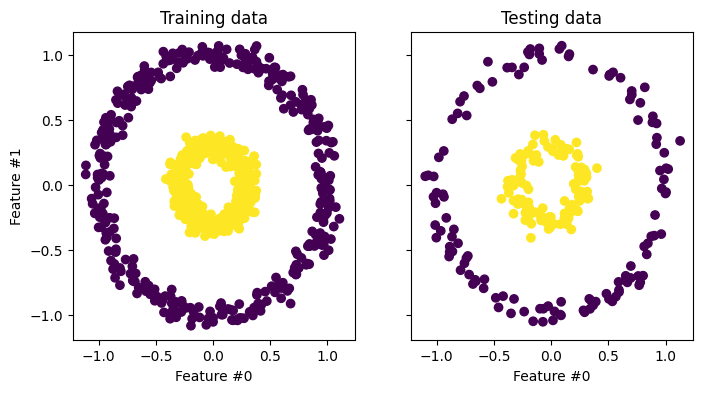

In [115]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

n_neighbors = 12
n_components = 2

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")


In [116]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=1)
X_test_lda = lda.fit(X_train, y_train).transform(X_test)


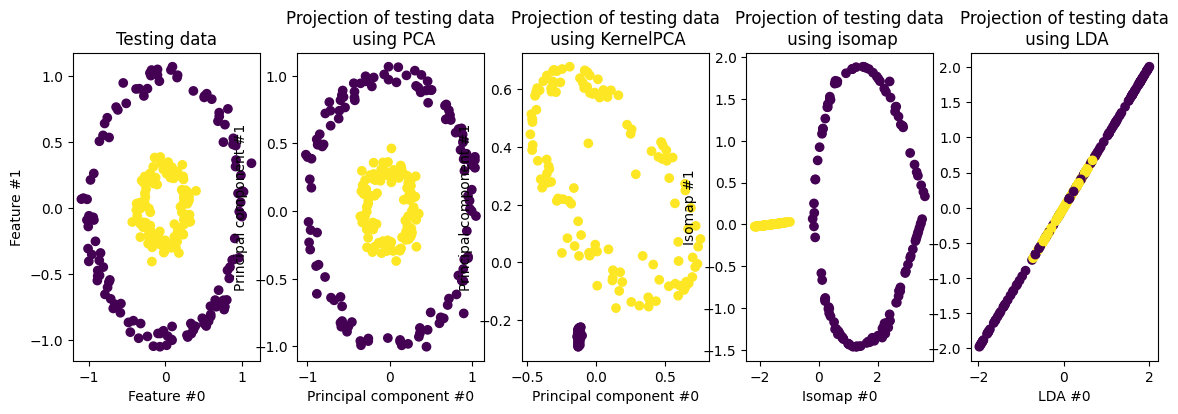

In [117]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax, isomap_proj_ax, lda_proj_ax) = plt.subplots(
    ncols=5, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

isomap_proj_ax.scatter(S_isomap[:, 0], S_isomap[:, 1], c=y_test)
isomap_proj_ax.set_ylabel("Isomap #1")
isomap_proj_ax.set_xlabel("Isomap #0")
_ = isomap_proj_ax.set_title("Projection of testing data\n using isomap")

lda_proj_ax.scatter(X_test_lda[:, 0], X_test_lda[:, 0], c=y_test)
lda_proj_ax.set_xlabel("LDA #0")
_ = lda_proj_ax.set_title("Projection of testing data\n using LDA")

In [118]:
rng = RandomState(0)
n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

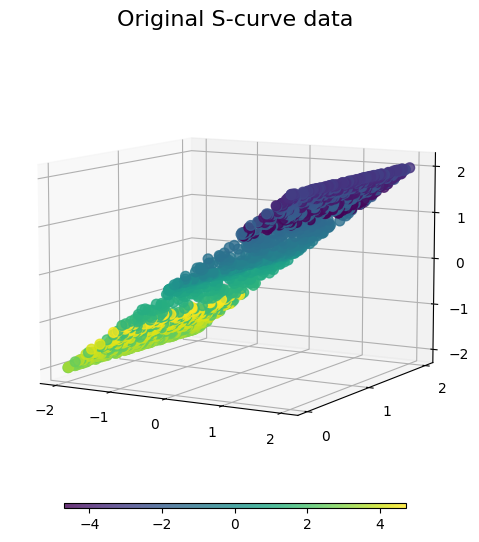

In [119]:
def plot_3d(points, points_color, title):
    x,y,z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)

    col= ax.scatter(z,y,z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


plot_3d(S_points, S_color, "Original S-curve data")
#apparently doesn't work in 3d as expected

In [120]:
# n_neighbors = 12
# n_components = 2

# isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
# S_isomap = isomap.fit_transform(S_points)

# pca = PCA(n_components=2)
# kernel_pca = KernelPCA(
#     n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
# )

# X_test_pca = pca.fit_transform(S_points)
# X_test_kernel_pca = kernel_pca.fit_transform(S_points)


# lda = LinearDiscriminantAnalysis()

# reduced_s_points = np.concatenate())
# X_test_lda = lda.fit(S_points, reduced_s_points).transform(S_points)
# print(X_test_lda.shape)



/home/sebastian/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: (array([-0.59830762, -2.83574418, -1.41645786, ...,  5.28037796,
        6.16269086,  3.7145481 ]),)

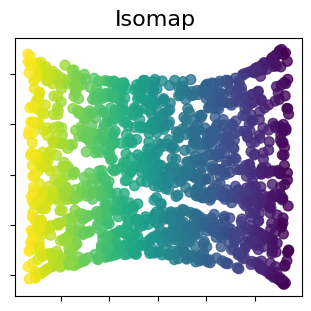

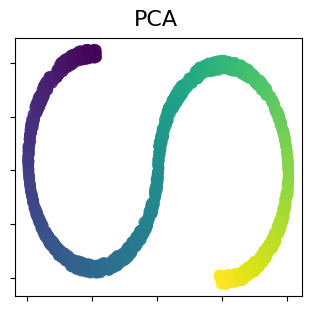

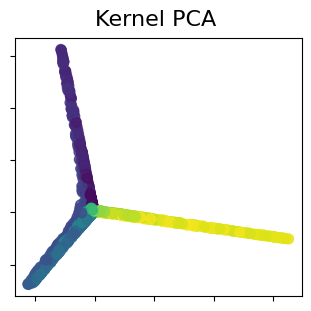

In [ ]:
# plot_2d(S_isomap, S_color, "Isomap")
# plot_2d(X_test_pca, S_color, "PCA")
# plot_2d(X_test_kernel_pca, S_color, "Kernel PCA")
